In [401]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
from langdetect import detect
from datetime import datetime

In [402]:
# import sklearn modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import Ridge, LogisticRegression, Lasso,ElasticNet
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [403]:
# import scipy modules
from scipy.stats import randint
from scipy.stats import uniform
import joblib
from IPython.display import SVG

In [404]:
# utils function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def save_model(model, name):
    fp = './models/'+name+'.pkl'
    joblib.dump(model, fp)

In [405]:
# import gradient boosting models
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [255]:
# H2O automl
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho
  JVM stdout: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho/h2o_kailing_started_from_python.out
  JVM stderr: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho/h2o_kailing_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_kailing_raid7k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [406]:
# neural nets
from keras import models, layers, optimizers, regularizers, Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import model_to_dot
from livelossplot.keras import PlotLossesCallback

In [647]:
# import data
_date_cols = ['host_since', 'first_review', 'last_review']
df = pd.read_csv('./data/train.csv', low_memory=False, parse_dates=_date_cols)
test_df = pd.read_csv('./data/test.csv', low_memory=False, parse_dates=_date_cols)
df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [648]:
def pre_drop_cols(df):
    useless_col = [
        'experiences_offered', 'host_acceptance_rate',
        'is_business_travel_ready', "square_feet", 'country_code'
    ]
    unique_id = ['id', 'host_id', 'name', 'host_name']
    df.drop(useless_col + unique_id, axis=1, inplace=True)
    
    return df

df = pre_drop_cols(df)
test_df = pre_drop_cols(test_df)

In [409]:
df.corr()['price']

host_listings_count               0.066808
accommodates                      0.513268
bathrooms                         0.293762
bedrooms                          0.381478
beds                              0.408146
price                             1.000000
guests_included                   0.302961
minimum_nights                    0.019503
maximum_nights                   -0.000608
number_of_reviews                -0.032250
review_scores_rating              0.049288
review_scores_accuracy            0.006649
review_scores_cleanliness         0.061048
review_scores_checkin            -0.006680
review_scores_communication       0.001658
review_scores_location            0.146426
review_scores_value              -0.031823
calculated_host_listings_count    0.078186
reviews_per_month                -0.023037
latitude                          0.050422
longitude                        -0.230645
Name: price, dtype: float64

# EDA

## feature type

In [55]:

# for col in df.columns:
#     col_type = df[col].dtypes

#     if col_type == int or col_type == float:
#         numerics.append(col)
#     else:
#         _num_unique = df[col].nunique()
#         if _num_unique <= 2000:
#             categorical.append(col)
#         else:
#             text.append(col)

In [41]:
# temp_combined = pd.concat([df[cate_cols], test_df[cate_cols]])
# temp_combined = temp_combined.apply(lambda x: x.fillna(x.value_counts()[0]))
# # one_hot = OneHotEncoder()
# # one_hot.fit(temp_combined)
# temp_combined.columns

### categorical cols cleaning

In [649]:
DF_LEN = 33538
TESTDF_LEN = 17337
# combine df and test_df for feature engineering
def combine_df(df, test_df):
    entire_df = pd.concat([df, test_df], ignore_index=True)
    return entire_df

def split(entire_df):
    df = entire_df.iloc[:DF_LEN].copy()
    test_df = entire_df.iloc[DF_LEN:].copy()
    test_df.drop('price', axis=1, inplace=True)
    return df, test_df

entire_df = combine_df(df, test_df)

In [650]:
def clean_extra_people(df):
    df['extra_people'] = df['extra_people'].str.lstrip('$').astype(float)
    return df

entire_df = clean_extra_people(entire_df)


# # replace property_type value_counts <= 10 to 'Other'
# def replace_property_type(df):
#     s = df['property_type'].value_counts()
#     df['property_type'] = np.where(df['property_type'].isin(s.index[s > 5]),
#                                    df['property_type'], 'Other')
#     return df


# df = replace_property_type(df)
# test_df = replace_property_type(test_df)


# replace host_neighbourhood value_counts <= 1 to 'Other'
def replace_host_neighbourhood(df):
    s = df['host_neighbourhood'].value_counts()
    df['host_neighbourhood'] = np.where(
        df['host_neighbourhood'].isin(s.index[s > 1]),
        df['host_neighbourhood'], 'Other')
    return df


entire_df = replace_host_neighbourhood(entire_df)

In [419]:
entire_df['require_guest_phone_verification'].value_counts()

f    49524
t     1351
Name: require_guest_phone_verification, dtype: int64

## a quick model

In [12]:
# drop text + datetimelike columns and columns that has over 500 null values
# def quick_drop(df):
#     # drop text andd datetimelike columns
#     df_copy = df.copy()
#     df_copy.drop(text+datetimelike, axis=1, inplace=True)
    
#     # drop cols that has more than 500 null values
#     null_cols = []
#     for col in df_copy.columns:
#         if df_copy[col].isnull().sum() > 500:
#             df_copy.drop(col, axis=1, inplace=True)
#         elif col in numerics:
#             # fill null values with mean
#             df_copy[col].fillna(df_copy[col].mean())
        
#     df_copy.dropna(inplace=True)
#     return df_copy

In [226]:
# quick_cleaned_df = quick_drop(df)

In [55]:
# # quick feature transformation
# def quick_feature_transformation(df):
#     for col in df.columns:
#         if col in categorical:
#             _onehot_df = pd.get_dummies(df[[col]],prefix=col)
#             df = pd.concat([df, _onehot_df], axis=1)
#             df.drop(col, axis=1, inplace=True)
#     return df
# quick_cleaned_df = quick_feature_transformation(quick_cleaned_df)

In [88]:
# # quick train val split
# quick_X = quick_cleaned_df.drop('price', axis=1).copy()
# quick_y = quick_cleaned_df['price']

# def is_ascii(s):
#     return all(ord(c) < 128 for c in s)

# for col in quick_cleaned_df.columns:
#     if not is_ascii(col):
#         quick_cleaned_df.drop(col, axis=1, inplace=True)

# quick_X_train, quick_X_test, quick_y_train, quick_y_test = train_test_split(
#     quick_X, quick_y, test_size=0.3, random_state=42)

In [59]:
# # build a quick RandomForest
# def quick_rf_reg(X_train, y_train):
#     rf_reg = RandomForestRegressor(verbose=1)

#     params = {
#         'n_estimators': np.arange(100, 500),
#         'max_depth': np.arange(3, 8),
#         'min_samples_split': np.arange(3, 10),
#         'min_samples_leaf': np.arange(3, 10),
#         'max_features': ['auto', None],
#         'warm_start': [True, False],
#         'bootstrap': [True, False]
#     }

#     reg = RandomizedSearchCV(rf_reg,
#                              params,
#                              scoring='neg_root_mean_squared_error',
#                              n_jobs=-1,
#                              verbose=2,
#                              random_state=42)
    
#     # train 
#     reg.fit(X_train, y_train)
    
#     return reg

In [ ]:
# quick_rf_randomCV = quick_rf_reg(quick_X_train, quick_y_train)

In [62]:
# quick_rf_randomCV.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=790, n_jobs=None, oob_score=False,
                      random_state=None, verbose=2, warm_start=True)

In [74]:
# quick_y_pred = quick_rf_randomCV.predict(quick_X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 790 out of 790 | elapsed:    0.3s finished


In [75]:
# rmse(quick_y_test, quick_y_pred)

92.92274059385808

In [98]:
# # lightbgm quick train
# lgbm = LGBMRegressor(max_depth=6, min_child_samples=4, n_estimators=700)   
# quick_X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in quick_X_train.columns]
# quick_X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in quick_X_test.columns]
# lgbm.fit(quick_X_train, quick_y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=6,
              min_child_samples=4, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=700, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [99]:
# quick_y_pred = lgbm.predict(quick_X_test)
# rmse(quick_y_test, quick_y_pred)

89.82753925687697

## Data Analysis

### check shape

In [413]:
df.shape, test_df.shape, entire_df.shape

((33538, 58), (17337, 57), (50875, 58))

### Numeric Analysis

In [619]:
# highly corelated cols
high_corr = [
    ['host_listings_count', 'calculated_host_listings_count'],
    [
        'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_communication',
        'review_scores_communication', 'review_scores_value'
    ], ['host_response_time', 'host_response_rate'],
    ['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'zipcode'],
    ['require_guest_phone_verification', 'require_guest_profile_picture']
]

num_cols = [
    'calculated_host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
    'beds', 'guests_included', 'minimum_nights', 'number_of_reviews',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'extra_people',
]

cate_cols = [
    'host_is_superhost', 'property_type', 'room_type', 'bed_type',
    'neighbourhood_group_cleansed', 'transit','host_identity_verified', 
]

drop_obj_cols = ['host_location']

drop_cate_cols = [
    'city', 'state', 'country', 'market', 'maximum_nights',
    'review_scores_accuracy', 'review_scores_communication',
    'review_scores_checkin', 'host_neighbourhood', 'review_scores_value',
    'host_has_profile_pic', 'require_guest_phone_verification',
    'host_location', 'neighbourhood_cleansed','instant_bookable'
]

list_cols = ['amenities', 'host_verifications']

date_cols = ['host_since', 'first_review', 'last_review']

text_cols = [
    'summary', 'space', 'description', 'neighborhood_overview', 'notes',
    'transit', 'access', 'interaction', 'house_rules', 'host_about'
]
label = ['price']

In [620]:
def featengi_bycol(df, colname, feat_lst): 
    gourp_cols = num_cols + [colname]
    
    if 'mean' in feat_lst:
        temp_mean = df[gourp_cols].groupby([colname]).transform(lambda x: x.mean())
        temp_mean = temp_mean.add_prefix(colname[:5]+'_mean_')
        df = pd.concat([df, temp_mean], axis=1)
        num_cols.extend(temp_mean.columns.values.tolist())
    if 'std' in feat_lst:
        temp_std = df[gourp_cols].groupby([colname]).transform(lambda x: x.std())
        temp_std = temp_std.add_prefix(colname[:5] + '_std_')
        df = pd.concat([df, temp_std], axis=1)
        num_cols.extend(temp_std.columns.values.tolist())
    if 'max' in feat_lst:
        temp_max = df[gourp_cols].groupby([colname]).transform(lambda x: x.max())
        temp_max = temp_max.add_prefix(colname[:5] + '_max_')
        df = pd.concat([df, temp_max], axis=1)
        num_cols.extend(temp_max.columns.values.tolist())
    if 'min' in feat_lst:
        temp_min = df[gourp_cols].groupby([colname]).transform(lambda x: x.min())
        temp_min = temp_min.add_prefix(colname[:5] + '_min_')
        df = pd.concat([df, temp_min], axis=1)
        num_cols.extend(temp_min.columns.values.tolist())
    if 'median' in feat_lst:
        temp_median = df[gourp_cols].groupby([colname]).transform(lambda x: x.median())
        temp_median = temp_median.add_prefix(colname[:5] + '_median_')
        df = pd.concat([df, temp_median], axis=1)
        num_cols.extend(temp_median.columns.values.tolist())
    return df

#entire_df = featengi_bycol(entire_df, 'neighbourhood_group_cleansed', ['mean','max','std'])
entire_df = featengi_bycol(entire_df, 'neighbourhood_cleansed', ['mean','max'])
# entire_df = featengi_bycol(entire_df, 'room_type')
# entire_df = featengi_bycol(entire_df, 'property_type')


In [621]:
def calculated_features(df):
    # compute host_about length 
    # df['host_about_len'] = df['host_about'].str.len()
    # df['host_about_len'] = df['host_about_len'].fillna(df['host_about_len'].mean())
    # df['description_len'] = df['description'].str.len()
    
    # number of accommdates per beds
    df['accom_per_beds'] = df['accommodates'] / df['beds']
    df['accom_per_beds'] = df['accom_per_beds'].apply(lambda x: 4 if x == float('inf') else x)
    # number of accommdates per bath
    df['accom_per_bath'] = df['accommodates'] / df['bathrooms']
    df['accom_per_bath'] = df['accom_per_bath'].apply(lambda x: 4 if x == float('inf') else x)
    # number of beds per bedroom
#     df['bed_per_bedrooms'] = df['beds'] / df['bedrooms']
#     df['bed_per_bedrooms'] = df['bed_per_bedrooms'].apply(lambda x: 0 if x == float('inf') else x)
    
    
    # host location 1 if local else 0
    df['host_location'] = df['host_location'].str.contains('NY|New York|纽约|Brooklyn|Manhattan').astype('str')
    df['transit'] = df['transit'].str.contains('Subway|Train|train|subway|Buses|buses').astype('str')
    
#     if 'host_about_len' not in num_cols:
#         num_cols.append('host_about_len')
    if 'accom_per_beds' not in num_cols:
        num_cols.append('accom_per_beds')
#     if 'description_len' not in num_cols:
#         num_cols.append('description_len')
    if 'accom_per_bath' not in num_cols:
        num_cols.append('accom_per_bath')
#     if 'bed_per_bedrooms' not in num_cols:
#         num_cols.append('bed_per_bedrooms')
    
    df['accom_per_beds_ratio'] = df['accom_per_beds'].apply(lambda x: '1' if x <= 1. else '0')
    if 'accom_per_beds_ratio' not in cate_cols:
        cate_cols.append('accom_per_beds_ratio')
        
    bath_per_bed = df['bathrooms'] / df['beds']
    df['bath_per_bed'] = bath_per_bed.apply(lambda x: '1' if x >= 1. else '0')
    if 'bath_per_bed' not in cate_cols:
        cate_cols.append('bath_per_bed')
    
    # extra people
    df['extrra_ppl'] = df['accommodates'] - df['guests_included']
    if 'extrra_ppl' not in num_cols:
        num_cols.append('extrra_ppl')
    
    # night duration
    df['nights_duration'] = df['maximum_nights'] - df['minimum_nights']
    if 'nights_duration' not in num_cols:
        num_cols.append('nights_duration')
    
    return df
entire_df = calculated_features(entire_df)

In [622]:
def fill_null(df):
    # fill number of review 0
    df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
    return df
entire_df = fill_null(entire_df)

In [623]:
# fill with mean grouoby neighbourhood_group_cleansed
entire_df[num_cols] = entire_df[num_cols].fillna(
    entire_df[num_cols + ['neighbourhood_group_cleansed']].groupby(
        ['neighbourhood_group_cleansed'])[num_cols].transform('mean'))

### timestamp

In [624]:
# fill na in date cols
def fillna_datetime(df):
    temp = df.copy()
    for col in date_cols:
        '''
        missing_date = list(temp[temp[col].isnull()].index)
        mean_date = temp[col].drop(missing_date)
        temp.loc[missing_date, col] = (mean_date - mean_date.min()).mean() + mean_date.min()
        '''
        df[col] = df[col].fillna(min(df[col]))

    return temp

entire_df = fillna_datetime(entire_df)

def review_diff(df):
    df['review_diff'] = (df['last_review'] - df['first_review']).apply(lambda x: x.days)
    df['host_duration'] = (df['last_review'] - df['host_since']).apply(lambda x: x.days)
    if 'review_diff' not in date_cols:
        date_cols.extend(['review_diff', 'host_duration'])
    return df

#entire_df = review_diff(entire_df)

### cate analysis

In [625]:
def host_verification(cols):
    possible_words = {}
    i = 0
    for col in cols:
        words = col.split()
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '' and wr not in possible_words:
                possible_words[wr] = i
                i += 1
    l = len(possible_words)

    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split()
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[possible_words[wr]] = 1
        new_cols[i] = arr
    return list(possible_words.keys()), new_cols
host_veri_keys, host_veri = host_verification(df['host_verifications'])

In [626]:
def amenities(cols):
    dic = {}
    i = 0
    len_ameni = []
    for col in cols:
        arr = col.split(',')
        cnt = 0
        for a in arr:
            ar = re.sub(r'\W+', '', a)
            if len(ar) > 0:
                cnt += 1
                if ar not in dic:
                    dic[ar] = i
                    i += 1
        len_ameni.append(cnt)
    l = len(dic)
    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split(',')
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[dic[wr]] = 1
        new_cols[i] = arr
    return list(dic.keys()), new_cols, len_ameni
ameni_keys, ameni, len_ameni = amenities(df['amenities'])

In [627]:
class ListTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, col_names=None):
        self.col_names = col_names
        self.useful_cols = [
            'Airconditioning', 'Gym', 'Elevator', 'Washer', 'Dryer',
            'Buildingstaff', 'TV', 'Paidparkingoffpremises',
            'Familykidfriendly', 'Dishwasher', 'CableTV', 'Doorman', 'Crib',
            'PacknPlaytravelcrib', 'Indoorfireplace'
        ]
        self.host_cols = [
            'email', 'phone', 'reviews', 'jumio', 'government_id',
            'manual_offline', 'facebook', 'kba', 'offline_government_id',
            'sent_id', 'selfie', 'identity_manual', 'work_email', 'google',
            'manual_online', 'sesame', 'weibo', 'None'
        ]

    def fit(self, X, y=None):
        self.X_copy = X.copy()
        if 'amenities' not in self.X_copy.columns:
            raise "Amenities is not in the dataset"
        else:
            ameni_keys, ameni, len_ameni = amenities(self.X_copy['amenities'])
            self.ameni_keys = ameni_keys
            ameni = ameni.T
            for ix, key in enumerate(ameni_keys):
                if key in self.useful_cols:
                    self.X_copy[key] = ameni[ix]
            for use_col in self.useful_cols:
                if use_col not in self.X_copy.columns:
                    self.X_copy[use_col] = np.zeros(self.X_copy.shape[0])
            self.X_copy['len_ameni'] = len_ameni
            self.X_copy.drop('amenities', axis=1, inplace=True)

        if 'host_verifications' not in self.X_copy.columns:
            raise "host_verifications is not in the dataset"
        else:
            host_veri_keys, host_veri = host_verification(
                self.X_copy['host_verifications'])
            self.host_veri_keys = host_veri_keys
            host_veri = host_veri.T
            for ix, key in enumerate(self.host_cols):
                if key in self.host_cols:
                    self.X_copy[key] = host_veri[ix]
            for use_col in self.host_cols:
                if use_col not in self.X_copy.columns:
                    self.X_copy[use_col] = np.zeros(self.X_copy.shape[0])
            self.X_copy.drop('host_verifications', axis=1, inplace=True)

        return self.X_copy.values

    def transform(self, X, y=None):
        X_temp = X.copy()
        if 'amenities' not in X_temp.columns:
            raise "Amenities is not in the dataset"
        else:
            ameni_keys, ameni, len_ameni = amenities(X_temp['amenities'])
            ameni = ameni.T
            for ix, key in enumerate(ameni_keys):
                if key in self.useful_cols:
                    X_temp[key] = ameni[ix]
            for use_col in self.useful_cols:
                if use_col not in X_temp.columns:
                    X_temp[use_col] = np.zeros(X_temp.shape[0])
            X_temp['len_ameni'] = len_ameni
            X_temp.drop('amenities', axis=1, inplace=True)

        if 'host_verifications' not in X_temp.columns:
            raise "host_verifications is not in the dataset"
        else:
            host_veri_keys, host_veri = host_verification(
                X_temp['host_verifications'])
            host_veri = host_veri.T
            for ix, key in enumerate(host_veri_keys):
                if key in self.host_cols:
                    X_temp[key] = host_veri[ix]
            for key in self.host_cols:
                if key not in X_temp.columns:
                    X_temp[key] = np.zeros(X_temp.shape[0])
            X_temp.drop('host_verifications', axis=1, inplace=True)

        return X_temp.values

    def fit_transform(self, X, y=None):
        return self.fit(X)

### NLP analysis

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /Users/kailing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kailing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# define some common lingo
custom_stopwords = ['bedroom', 'bathroom', 'apartment']

def remove_hypens(book_text):
    return re.sub(r'(\w+)-(\w+)-?(\w)?', r'\1 \2 \3', book_text)

# tokenize text
def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation))) 
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens]) 
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens, custom_stopwords):
    stopword_list = nltk.corpus.stopwords.words('english')
    stopword_list += custom_stopwords
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def get_lemma(tokens):
    lemmas = []
    for word in tokens:
        lemma = wn.morphy(word)
        if lemma is None:
            lemmas.append(word)
        else:
            lemmas.append(lemma)
    return lemmas

def remove_short_tokens(tokens):
    return [token for token in tokens if len(token) > 3]

def keep_only_words_in_wordnet(tokens):
    return [token for token in tokens if wn.synsets(token)]

def apply_lemmatize(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

# I like to think of each row of text as a book
# input to this function is a list of books
def nlp_pipeline(book_texts):
    clean_books = []
    for book in book_texts:
        try:
            book = remove_hypens(book)
            book_i = tokenize_text(book)
            book_i = remove_characters_after_tokenization(book_i)
            book_i = convert_to_lowercase(book_i)
            book_i = remove_stopwords(book_i, custom_stopwords)
            book_i = get_lemma(book_i)
            book_i = remove_short_tokens(book_i)
            book_i = keep_only_words_in_wordnet(book_i)
            book_i = apply_lemmatize(book_i)
            clean_books.append(book_i)
        except:
            clean_books.append('cannot clean')
    return clean_books

In [23]:
descriptions = list(entire_df.description)
clean_descriptions = nlp_pipeline(descriptions)

In [24]:
# rejoin the tokens to form strings which will be used to vectorize
clean_descriptions_text = [' '.join(item) for item in clean_descriptions]

clean_descriptions_text[:2]

['modern large studio amenity appliance floor brooklyn manhattan subway major subway close fort greene park center great restaurant available unit available building additional cost place little quiet sanctuary heart fort greene amaze view common area floor looking respectful guest treat home studio available almost identical slightly smaller rest information offering additional discount dishwasher internet roof access reception area breakfast common area depend time visit greet leave concierge brooklyn city point fort greene park prospect park amaze',
 'harlem back gorgeous visit explore rare high floor bedroom triple offer space convenience heart harlem york city comfortably sleep people walking distance harlem back gorgeous visit explore rare high floor triple offer space convenience heart harlem york city comfortably sleep people harlem back gorgeous visit explore rare high floor triplex offer space convenience heart harlem york city private entrance triplex home comfortably sleep 

In [372]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.95, max_features=20,
                                   ngram_range=(1,1), stop_words='english')

tfidf_feature_matrix = tfidf_vectorizer.fit_transform(clean_descriptions_text)

tfidf_df = pd.DataFrame(tfidf_feature_matrix.toarray())
entire_df = pd.concat([entire_df, tfidf_df], axis=1)

In [628]:
lst_100 = list(np.arange(20))
entire_df = pd.concat([entire_df, tfidf_df], axis=1)

In [629]:
# split entire df
df, test_df = split(entire_df)

## drop outliers

In [809]:
# 1. bathrooms > 6
# 2. accommodate > 10 and price < 100
# 3. guest_included > 10 andd price < 100
drop_row_ix = []
#ix1 = df[df['bathrooms'] > 6].index.values.tolist()
#ix2 = df[(df['accommodates'] > 10) &  (df['price'] < 100)].index.values.tolist()
#ix3 = df[(df['guests_included'] > 10) &  (df['price'] < 100)].index.values.tolist()
#drop_row_ix = ix1#+ix2+ix3
# df = df.drop(drop_row_ix)
# df.shape

(33528, 74)

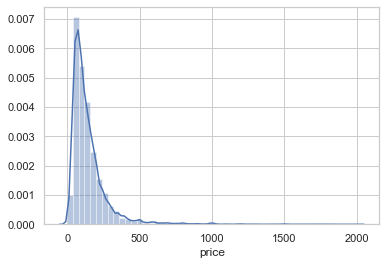

In [354]:
sns.distplot(y_train)

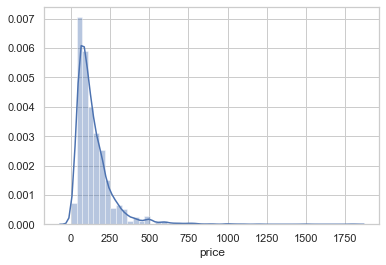

In [355]:
sns.distplot(y_test)

# Model Pipeline

## feature transform

In [630]:
numeric_transformer = Pipeline(
    steps=[  #('imputer',SimpleImputer(strategy='median')), 
        ('scaler', MinMaxScaler())
    ])
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='_')
            ), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

text_transformer = Pipeline(
    steps=[('text', CountVectorizer()), ('svd',
                                         TruncatedSVD(n_components=100))])

column_transfomer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cate_cols),
    ('date', MinMaxScaler(), date_cols),
    #('log', FunctionTransformer(np.log1p), ['bedrooms']),
    ('list', ListTransformer(), list_cols),
], remainder='passthrough')

# preprocessor = Pipeline(
#     steps=[('cols_transformer',
#             column_transfomer), ('pca', TruncatedSVD(n_components=500))])

In [631]:
X = df[num_cols + cate_cols + date_cols + list_cols + lst_100]  #
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=10)

X_train = column_transfomer.fit_transform(X_train)
X_test = column_transfomer.transform(X_test)

In [121]:
# for testing
temp_pca = TruncatedSVD(n_components=140, random_state=42)
temp_pca.fit(X_train)

TruncatedSVD(algorithm='randomized', n_components=140, n_iter=5,
             random_state=42, tol=0.0)

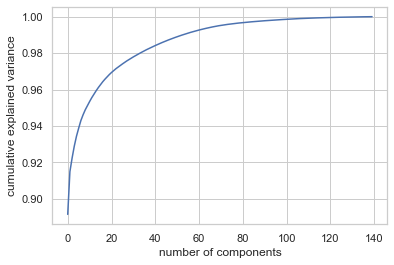

None

In [122]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(temp_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [641]:
X_train.shape, X_test.shape

((30184, 118), (3354, 118))

In [640]:
X_train = X_train[:, important_features_ix]
X_test = X_test[:, important_features_ix]
X_final = X_final[:, important_features_ix]

## lgbm

In [633]:
def random_search_cv(reg, params):
    random_reg = RandomizedSearchCV(reg,
                              params,
                              verbose=1,
                              n_jobs=-1,
                              scoring="neg_root_mean_squared_error",
                              cv=5,
                              n_iter=10,
                              refit=True,
                              random_state=42)
    return random_reg

In [634]:
def lgbm_reg(X_train, y_train, X_test, y_test):
    from numpy.random import randint
    lgbm = LGBMRegressor(verbose=1, n_estimators=10000, learning_rate=0.01)

    #train_data = lightgbm.Dataset(X_train, y_train)
    #val_data = lightgbm.Dataset(X_test, y_test, reference=train_data)

    params = {
        "num_leaves": np.arange(10, 50),
        'min_child_samples': np.arange(10, 50),
        'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
        'max_depth': np.arange(3, 10),
        'subsample': uniform(loc=0.2, scale=0.8),
        'colsample_bytree': uniform(loc=0.4, scale=0.6),
        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50],
        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

    random_lgbm = random_search_cv(lgbm, params)
    random_lgbm.fit(X_train,
                    y_train,
                    eval_set=(X_test, y_test),
                    eval_metric='rmse',
                    early_stopping_rounds=100,
                    verbose=1)

    return random_lgbm

In [127]:
def xgb_reg(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor(verbosity=1, n_estimators=5000)
    params = {
        "max_depth": np.arange(3, 10),
        "learning_rate": [0.01, 0.05],
        'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
        "gamma": [0.1, 0.2, 0.3],
        "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
        'max_delta_step': [1, 3 ,7],
        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 20, 50],
        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

    random_xgb = random_search_cv(xgb, params)
    random_xgb.fit(X_train,
                   y_train,
                   eval_set= [(X_test, y_test)],
                   eval_metric='rmse',
                   early_stopping_rounds=100,
                   verbose=1)

    return random_xgb

In [25]:
def knn_reg(X_train, y_train):
    knn = KNeighborsRegressor()
    params = {
        "n_neighbors": np.arange(10, 200),
        'algorithm': ['auto', 'kdtree'],
        "leaf_size": np.arange(10, 100)
    }
    
    random_knn = random_search_cv(knn, params)
    random_knn.fit(X_train, y_train)
    
    return random_knn

In [128]:
def svr_reg(X_train, y_train):
    svr = SVR(verbose=1)
    params ={
        "C": [0.01, 0.1, 1, 5, 10],
        "gamma": ['scale', 'auto', 0.1, 1],
        
    }
    
    random_svr = random_search_cv(svr, params)
    random_svr.fit(X_train, y_train)
    
    return random_svr

In [146]:
def ridge_reg(X_train, y_train):
    ridge = Ridge()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "max_iter": [1000, 10000]
    }
    
    random_ridge = random_search_cv(ridge, params)
    random_ridge.fit(X_train, y_train)
    
    return random_ridge

def lasso_reg(X_train, y_train):
    lasso = Lasso()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "max_iter": [10000, 100000],
        "warm_start": [True, False]
    }
    
    random_lasso = random_search_cv(lasso, params)
    random_lasso.fit(X_train, y_train)
    
    return random_lasso

def elastic_reg(X_train, y_train):
    elasticNet = ElasticNet()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
        "max_iter": [1000, 10000],
        "warm_start": [True, False]
    }
    
    random_ElasticNet = random_search_cv(ElasticNet, params)
    random_ElasticNet.fit(X_train, y_train)
    
    return random_ElasticNet

In [33]:
def eval_model(model):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    print("RMSE")
    print("Train RMSE: " + str(rmse(y_train, y_train_pred)))
    print("Test RMSE: " + str(rmse(y_test, y_val_pred)))
    print("Train R2: " + str(r2_score(y_train, y_train_pred)))
    print("Test R2: " + str(r2_score(y_test, y_val_pred)))
    try:
        print("Best Params: "+ str(model.best_params_))
        print("Best Score: " + str(model.best_score_))
    except:
        pass

In [ ]:
#randSearch_lgbm = lgbm_reg(X_train, y_train, X_test, y_test)
make_submission(randSearch_lgbm.predict(X_final))

In [643]:
eval_model(randSearch_lgbm)
#rmse(np.expm1(y_test), np.expm1(randSearch_lgbm.predict(X_test)))

RMSE
Train RMSE: 70.18518667273587
Test RMSE: 74.46210619739587
Train R2: 0.726954024922777
Test R2: 0.6238972045236234
Best Params: {'colsample_bytree': 0.6247240713084175, 'max_depth': 7, 'min_child_samples': 24, 'min_child_weight': 0.1, 'num_leaves': 17, 'reg_alpha': 5, 'reg_lambda': 10, 'subsample': 0.3248149123539492}
Best Score: -84.3869780506419


In [644]:
randSearch_lgbm.best_estimator_.feature_importances_

array([ 771, 1525, 1482, 1333,  460,  735, 1048,  926,  521,  279,  190,
       1376,  617, 1052,  458,  384,  248,  315,  290,  211,  471,  347,
        237,  243, 1449,  298,  314,  616,  555,  101,  151,   51,  140,
        221,  226,  290,  110,  246,  604,  780,  783, 1220, 1003,   45,
         39,  374,   51,   17,  156,   21,  124,   83,   11,  264,  232,
        175,   43,    6,  110,   53,  127,   50,   59,   23,   48,   12,
       1267,  963, 1385,   69,  237,  196,  262,  139,  110,  215,  258,
        219,  165,   94,  225,  162,   80,   71, 1184,   29,   41,   78,
         63,   48,   21,   14,   34,   25,  106,   28,   26,   59,  539,
        123,  420,  377,  650,  209,  481,  499,  455,  292,   90,  240,
        462,  641,  319,  661,  735,  318,  324,  215])

In [638]:
a = randSearch_lgbm.best_estimator_.feature_importances_
important_features_ix = np.where(a >= 10)[0]
important_features_ix

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  39,  40,  41,
        42,  43,  44,  45,  47,  48,  50,  59,  65,  68,  69,  70,  71,
        75,  78,  79,  80,  82,  87,  88,  91,  92,  93,  95,  96,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126,
       128, 129, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157])

## stacking with multiple models

In [ ]:
# xgboost
randSearch_xgb = xgb_reg(X_train, y_train, X_test, y_test)

In [131]:
#save_model(randSearch_xgb, "random_xgb")
#save_model(randSearch_xgb.best_estimator_, "best_xgb")
eval_model(randSearch_xgb)

RMSE
Train RMSE: 72.46335346481933
Test RMSE: 75.96103282649044
Train R2: 0.7089405413077235
Test R2: 0.6086028571029886
Best Params: {'reg_lambda': 5, 'reg_alpha': 20, 'min_child_weight': 0.1, 'max_depth': 7, 'max_delta_step': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best Score: -87.55622347768957


In [124]:
# knn
randSearch_knn = knn_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.3min finished


In [205]:
save_model(randSearch_knn, "random_knn")
save_model(randSearch_knn.best_estimator_, "best_knn")
# eval_model(randSearch_knn)

RMSE
Train RMSE: 103.61813540311539
Test RMSE: 108.76656329986805
Best Params: {'weights': 'uniform', 'n_neighbors': 60, 'leaf_size': 12, 'algorithm': 'auto'}
Best Score: -106.21092632843352


In [133]:
# SVR
randSearch_svr = svr_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.0min finished


[LibSVM]

In [134]:
eval_model(randSearch_svr)

RMSE
Train RMSE: 108.31343288638355
Test RMSE: 99.83071576581169
Train R2: 0.3497063675103226
Test R2: 0.3239725999006552
Best Params: {'gamma': 0.1, 'C': 10}
Best Score: -111.80537402326081


In [137]:
# ridge
randSearch_ridge = ridge_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


In [138]:
eval_model(randSearch_ridge)

RMSE
Train RMSE: 92.21367222674715
Test RMSE: 82.81840088023806
Train R2: 0.528658700403937
Test R2: 0.5347465417094214
Best Params: {'max_iter': 1000, 'alpha': 0.1}
Best Score: -93.65404439603972


In [145]:
# lasso
randSearch_lasso = lasso_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


In [147]:
eval_model(randSearch_lasso)

RMSE
Train RMSE: 92.38841852050194
Test RMSE: 83.02268385141397
Train R2: 0.5268706100958356
Test R2: 0.5324484877370355
Best Params: {'warm_start': True, 'max_iter': 10000, 'alpha': 0.01}
Best Score: -93.51756846719118


In [ ]:
# elastic net
randSearch_elastic = elastic_reg(X_train, y_train)

In [ ]:
eval_model(randSearch_elastic)

## Random forest

In [458]:
def rf_reg(X_train, y_train):
    rf_reg = RandomForestRegressor(verbose=1)

    params = {
        'n_estimators': np.arange(100, 500),
        'max_depth': np.arange(3, 8),
        'min_samples_split': np.arange(3, 10),
        'min_samples_leaf': np.arange(3, 10),
        'max_features': ['auto', None],
        'warm_start': [True, False],
        'bootstrap': [True, False]
    }

    reg = RandomizedSearchCV(rf_reg,
                             params,
                             scoring='neg_root_mean_squared_error',
                             n_jobs=-1,
                             verbose=2,
                             random_state=42)
    
    # train 
    reg.fit(X_train, y_train)
    
    return reg

In [459]:
randSearch_reg = rf_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed:   37.3s finished


## lgbm stacking

In [499]:
def stacked_lgbm(X, y, num_lgbm=20):
    def eval_model(model, y, y_pred):
        print("RMSE: " + str(rmse(y, y_pred)))
        print("R2: " + str(r2_score(y, y_pred)))
       

    y_preds = []
    y_preds_final = []
    for i in range(num_lgbm):
        # split train test
        X_train, X_val, y_train, y_val = train_test_split(X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=i * 7)

        X_train = column_transfomer.fit_transform(X_train)
        X_val = column_transfomer.transform(X_val)
        # X_ = column_transfomer.transform(X)
        # X_test_ = column_transfomer.transform(X_test)

        randSearch_lgbm = lgbm_reg(X_train, y_train, X_val, y_val)
        print(
            "========================================================================"
        )
        print("Model #" + str(i))
        y_train_pred = randSearch_lgbm.predict(X_train)
        y_val_pred = randSearch_lgbm.predict(X_val)
        print('Train: ')
        print(eval_model(randSearch_lgbm, y_train, y_train_pred))
        print('--------------------------')
        print('Test: ')
        print(eval_model(randSearch_lgbm, y_val, y_val_pred))
        print(
            "========================================================================"
        )

        # append results
        X_final_ = column_transfomer.transform(test_df[num_cols + cate_cols +
                                                        date_cols+ list_cols+ lst_100])
        y_pred_final = randSearch_lgbm.predict(X_final_)
        y_preds.append(y_train_pred)
        #if rmse(y_val, y_val_pred) < 88:
        y_preds_final.append(y_pred_final)

    return np.array(y_preds).T, np.array(y_preds_final).T


def lasso_meta(y, y_preds, y_preds_final):
    # transpose y_preds
    lasso_meta = Lasso()
    lasso_meta.fit(y_preds, y)
    Y_FINAL = lasso_meta.predict(y_preds_final)
    return Y_FINAL, y_preds_final

In [ ]:
y_preds, y_preds_final = stacked_lgbm(X, y, num_lgbm=3)

In [35]:
below_88 = [0,1,3,4,9,11,12,16]

In [ ]:
make_submission(y_preds_final.mean(axis=1))

In [ ]:
y_preds_final_df = pd.DataFrame(y_preds_final)
make_submission(y_preds_final_df.iloc[:, below_88].mean(axis=1))

## blending model

In [161]:
'''
    0.1 * Elastic
    0.05 * Ridge
    0.05 * Lass
    0.1 * svr
    0.1 * gbr
    0.2 * xgb
    0.4 * lgbm
'''

def blend_model():
    pass

y_pred_blend = 0 * randSearch_lasso.predict(X_final) + \
        0 * randSearch_ridge.predict(X_final) + \
        0.5  * randSearch_xgb.predict(X_final) + \
        0.5  * randSearch_lgbm.predict(X_final)

#0.1*randSearch_elastic.predict(X_final) + /
#0.1  * randSearch_svr.predict(x_final) + /
#0.1  * gbr + /

In [ ]:
make_submission(y_pred_blend)

## H2O automl

In [294]:
# auto ml with 20 models
autoML = H2OAutoML(max_models=20, seed=1)
train = np.hstack([X_train, y_train.values.T.reshape(-1,1)])
training_frame = h2o.H2OFrame(train)
x = training_frame.columns[:-1]
y = training_frame.columns[-1]
autoML.train(x=x, y=y, training_frame=training_frame)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [295]:
autoML.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200516_180450,7390.34,85.9671,7390.34,41.7507,0.384508
StackedEnsemble_BestOfFamily_AutoML_20200516_180450,7481.91,86.498,7481.91,42.1194,0.387467
GBM_2_AutoML_20200516_180450,7566.26,86.9843,7566.26,42.7053,nan
GBM_3_AutoML_20200516_180450,7606.17,87.2134,7606.17,43.003,0.395771
GBM_grid__1_AutoML_20200516_180450_model_2,7645.52,87.4387,7645.52,43.2413,nan
GBM_4_AutoML_20200516_180450,7645.95,87.4411,7645.95,42.9036,0.39519
GBM_1_AutoML_20200516_180450,7697.43,87.735,7697.43,43.0636,nan
GBM_grid__1_AutoML_20200516_180450_model_1,7706.24,87.7852,7706.24,43.5269,nan
GBM_5_AutoML_20200516_180450,7788.24,88.251,7788.24,43.595,nan
XGBoost_grid__1_AutoML_20200516_180450_model_3,7876.02,88.7469,7876.02,44.3512,nan


In [308]:
val = np.hstack([X_test, y_test.values.T.reshape(-1,1)])
val_frame = h2o.H2OFrame(X_test)
test_frame = h2o.H2OFrame(X_final)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## transform X final

In [639]:
X_final = column_transfomer.transform(test_df[num_cols + cate_cols + date_cols+ list_cols + lst_100])

## Neural Networks

In [ ]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=20,
                  batch_size=256,
                  validation_split = 0.1)

In [ ]:
eval_model(nn2)
make_submission(nn2.predict(X_final).flatten())

# test submission

In [35]:
test_df = pd.read_csv('./data/test.csv', low_memory=False)
test_df.head(1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN


In [64]:
def make_submission(y_test_pred):
    from datetime import datetime
    test_df = pd.read_csv('./data/test.csv', low_memory=False)
    sub_df = pd.DataFrame({'Id': test_df['id'], 'Predicted': y_test_pred})
    sub_path = './submission/sub_'+str(datetime.now())+'.csv'
    sub_df.to_csv(sub_path, index=False)
    return sub_df
#make_submission(y_test_pred)